<IPython.core.display.Javascript object>


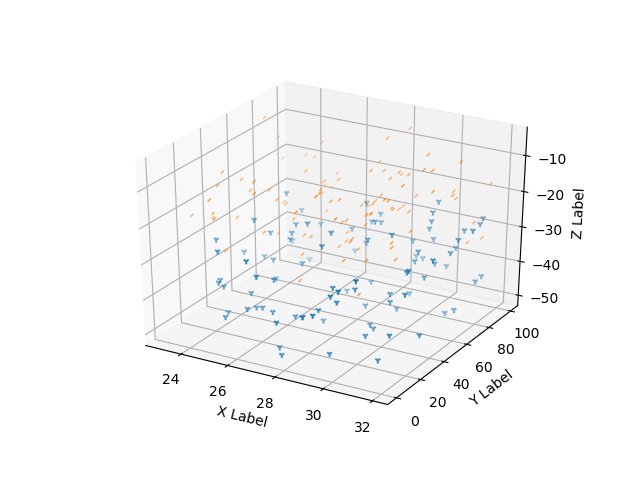

In [11]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('1', -50, -25), ([(0,0),(5,5)], -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)



plt.show()

<IPython.core.display.Javascript object>


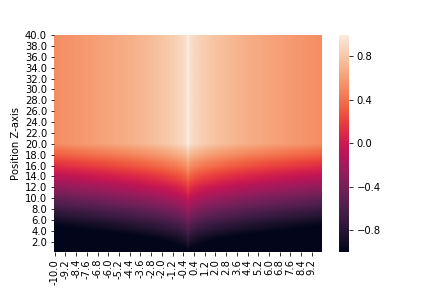

Text(33.0, 0.5, 'Position Z-axis')

In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib notebook


def map_function(reward_function, x, y, target_pos):
    R = pd.DataFrame(np.zeros([len(x), len(y)]), index=y, columns=x)
    for xx in x:
        for yy in y:
            R[xx][yy] = reward_function([xx, yy], target_pos)

    return R
    

#reward_function = lambda pose, target_pos: np.tanh(1.-.03*(abs(pose - target_pos)).sum()+pose[1]*.03)
#reward_function = lambda pose, target_pos: np.tanh(+pose[1]*.05 - .09*(abs(pose[0] - target_pos[0])))
#reward_function = lambda pose, target_pos: (1 + np.tanh((pose[1] - target_pos[1])*.1 + 1.5 - .05*(abs(pose[0] - target_pos[0]))))/2

start_pos = np.array([0, 10])
target_pos = np.array([0, 20])

def reward_function_o(p, t):
    if(p[1] > t[1]):
        p[1] = t[1]
    if (p[1] < start_pos[1]):
        p[1] = p[1] - start_pos[1]
    x_delta = np.sqrt(abs(p[0] - t[0]))
    base = (p[1] - x_delta)
    reward = (base) / t[1]
    return reward

def reward_function(p, t):
    if(p[1] > t[1]):
        p[1] = t[1]
    zt = t[1] / 2
    x_delta = 1.5 * np.sqrt(abs(p[0] - t[0]))
    base = (p[1] - x_delta)
    reward= max(-1, min(1, (base - zt)/zt))
    return reward
       
resolution = 200

def make_range(start, end, resolution):
    delta = end - start
    steps = delta/resolution
    return np.round(np.arange(start, end, steps), 2)

x_range = make_range(-10.0, 10.0, resolution)
z_range = make_range(40.0, 0.0, resolution)

R = map_function(reward_function, x_range, z_range, target_pos)

ax = sns.heatmap(R)
ax.set_xlabel("Position X-axis")
ax.set_ylabel("Position Z-axis")



<IPython.core.display.Javascript object>


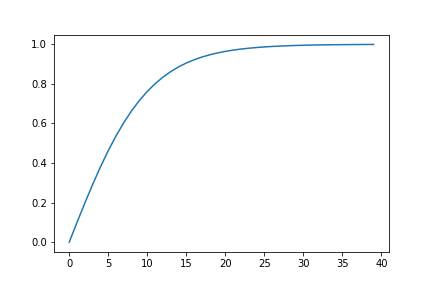

In [109]:
%matplotlib notebook

x = np.arange(0, 4, 0.1)
y = np.tanh(x)
plt.plot(y)

In [146]:
print(reward_function(start_pos, target_pos))
print(reward_function([0,9], target_pos))
print(reward_function([0,11], target_pos))
print(reward_function([0,20], target_pos))
print(reward_function([20,20], target_pos))

0.0
-0.1
0.1
1
0.10557280900008408
